Now, we will start learning another supervised learning algorithm for classification called K-Nearest Neighbours (KNN)

# KNN Algorithm (K-Nearest Neighbours) Stat Quest

Super simple algorithm for classifying data.

If you already had a lot of data that defined various classes, then we can tell easily tell to which class a new data point belongs to (essentially classification)


##### Applying KNN to Scattered data points

Step 1: Start with a dataset with known categories. Then cluster the data. (example using PCA)

Step 2: Add a new data point, with unknown category. 

Step 3: We classify the new cell by looking at the nearest annotated cells. (i.e. nearest neighbours)

Step 4: If the "K" in "K-Nearest neighbours" is equal to 1, then we only use the nearest neighbour to define the category
If K=11, we would use the 11 nearest neighbours to find the category.

Note: If say K = 11, and the data point is between two (or more) categories, we simply pick the category that 'gets the most votes'

Exactly same concept for applying to heatmaps of finding some K nearest neighbours and choosing the majority category!

The data used for initial clustering is called training data

##### How to find K?
There is no way to determine K by just looking at data obviously. You can do 10 fold cross validation on the training data, to find the best value of K for that data. Make sure however K is odd, so as to settle ties. 

Low values of K can be noisy and subject to effect of outliers

Large values of K altough smooth things out, but if some category has only few samples, then that will always be outvoted by other categories!

# KNN FROM SCRATCH

KNN can also be used to do regression

KNN doesn't have a model instead it just uses the training data  for each prediction

Because of this KNN is called Lazy Learner, since it predicts and works  only after the test data is introduced

Apart from classification and regression tasks, the KNN algorithm is  also used for missing value imputation, resampling datasets, outlier  detection, etc.

There are many ways of finding the K- nearest neighbours like drawing a rectangular decision boundary (K-dimensional Tree) or drawing a sphere (Ball-Tree)

We are going to implement Brute Force KNN


For Classification tasks, the Mode of data points corresponding to K top rows will be the predicted output and for Regression tasks, Mean/ Median will be the predicted output.

In [70]:
import numpy as np
import statistics as stats

In [31]:
#SKLEARN IMPLEMENTATION
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [6]:
iris = load_iris()

In [7]:
data = iris.data
target = iris.target

In [8]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2)

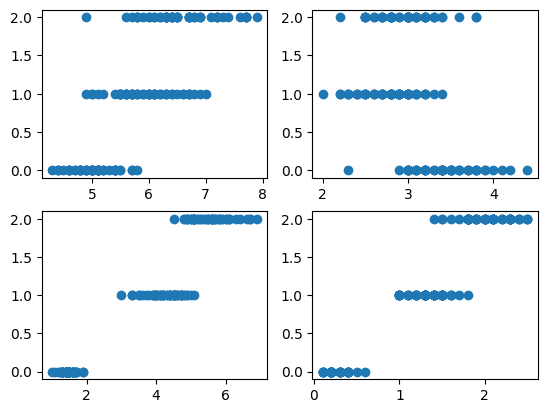

In [9]:
for i in range(len(data[0])):
    plt.subplot(2,2,i+1)
    plt.scatter(data[:,i],target)

In [10]:
#Data Preprocessing
scaler = StandardScaler()

In [11]:
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.fit_transform(data_test)

In [14]:
#For finding best value of K, we take a range and for each of those find the
#accuracy using sklearn implementation of k neighbour classifier

train_error = []
test_error = []
k = list(range(1,31))


for k in list(range(1,31)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train_scaled, target_train)
    
    target_pred_train = knn.predict(data_train_scaled)
    train_error.append(1-accuracy_score(target_pred_train, target_train))
    
    target_pred_test = knn.predict(data_test_scaled)
    test_error.append(1-accuracy_score(target_pred_test, target_test))
    

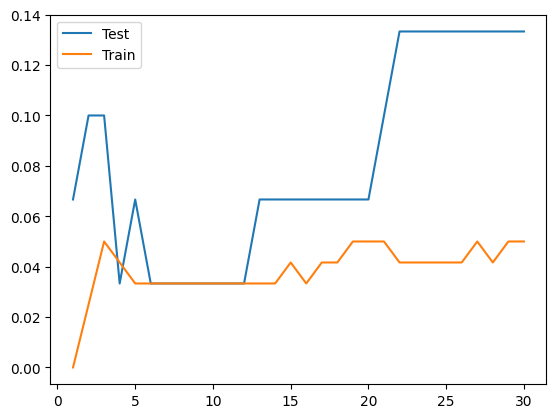

In [21]:
k = list(range(1,31))
plt.plot(k, test_error, label="Test")
plt.plot(k, train_error, label="Train")
plt.legend()

In [22]:
#So optimum value of K is 10!

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(data_train_scaled, target_train)
y_pred = knn.predict(data_test_scaled)

accuracy_score(y_pred, target_test)

0.9666666666666667

<Axes: >

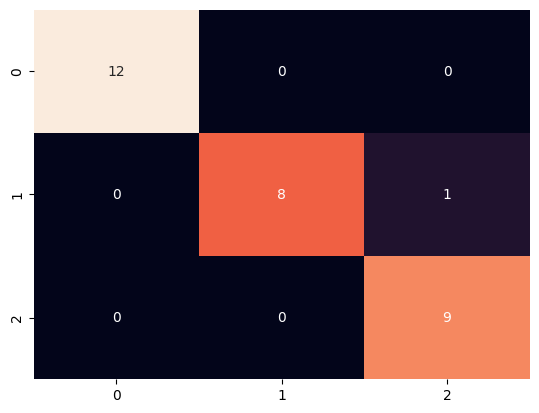

In [33]:
confm = confusion_matrix(target_test, y_pred)
sns.heatmap(confm, annot=True, cbar=False)

In [104]:
class bfKNN:
    def __init__(self, k=11, problem: int = 0):
        self.k = k
        self.problem = problem
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        #Pretty self explanatory code tbh
        y_pred = []
        for x in X_test:
            dist=[]
            for i, x_train in enumerate(self.X_train):
                dist.append([np.linalg.norm(x-x_train), self.y_train[i]])
            dist.sort()
            dist = dist[:self.k]
            pred = np.array(dist)[:,1]
            if self.problem:
                y_pred.append(stats.mode(pred)) #For classification
            else:
                y_pred.append(stats.mean(pred)) #For regression
        return y_pred
    
    '''
    def predict(self, X_test):
        import numpy as np
        from scipy import stats

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                d = (np.sqrt(np.sum(np.square(X_test[i,:] - self.X_train[j,:]))))  # Euclidean distance
                distance.append((d, self.y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            if self.problem == 0:
                y_pred.append(np.mean(neighbors))  # For Regression
            else:
                y_pred.append(stats.mode(neighbors)[0][0])  # For Classification
        return y_pred
    '''

In [105]:
#USING OUR BRUTEFORCE KNN
bknn = bfKNN(10, problem=1)

In [106]:
bknn.fit(data_train_scaled, target_train)

In [107]:
y_pred = bknn.predict(data_test_scaled)

In [108]:
accuracy_score(y_pred, target_test)

0.9666666666666667

In [102]:
confm = confusion_matrix(y_pred, target_test)

<Axes: >

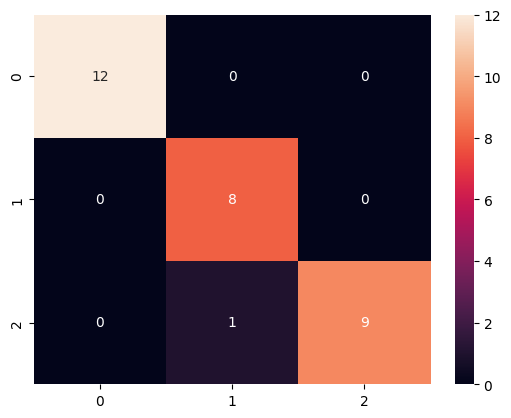

In [103]:
sns.heatmap(confm, annot=True)

In [ ]:
#I mean majority are true, but it still sucks
#My algorithm gave an accuracy of 50 something percent theirs gave 96% :(

#I FIXED IT!!
#The problem was that my algo had dist=[] outside the for loop for each training data, so it just kept adding to the same list,

#for all test points :)

https://www.kaggle.com/code/fareselmenshawii/knn-from-scratch#notebook-container

If data is unbalanced (check by plotting pie plot) you cannot use large values of K

Always before doing any report, do exploratory data analysis, using plotly.express and feature engineering

The best data analysis example for classification problems with lower number of features is given in the above link

